# Causal graph - domain knowledge inference
From the below graphs :
Country, Managed By
Managed By, Fulfill Via
Managed By, Shipment Mode
Country, Shipment Mode
Country, Product Group
Brand, Product Group
Product Group, Sub Classification


In [10]:
import pandas as pd
import seaborn as sns

In [4]:
path = "../data/SCMS_Delivery_History_Dataset.csv"
dataset = pd.read_csv(path)
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
dataset.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [20]:
cols_to_keep = [
    "Country",
    "Managed By",
    "Fulfill Via",
    "Shipment Mode",
    "Product Group",
    "Sub Classification",
    "Molecule/Test Type",
    "Brand",
    "Freight Cost (USD)",
    "Unit Price",
]
dataset_unit_price = dataset[cols_to_keep]
dataset_unit_price.head()

,Country,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,Molecule/Test Type,Brand,Freight Cost (USD),Unit Price
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,HRDT,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,780.34,0.97
1,Vietnam,PMO - US,Direct Drop,Air,ARV,Pediatric,Nevirapine,Generic,4521.5,0.03
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,HRDT,HIV test,"HIV 1/2, Determine Complete HIV Kit",Determine,1653.78,0.80
3,Vietnam,PMO - US,Direct Drop,Air,ARV,Adult,Lamivudine,Generic,16007.06,0.07
4,Vietnam,PMO - US,Direct Drop,Air,ARV,Adult,Stavudine,Generic,45450.08,0.05


## Country -> Managed By -> Fulfill Via ; Shipment Mode

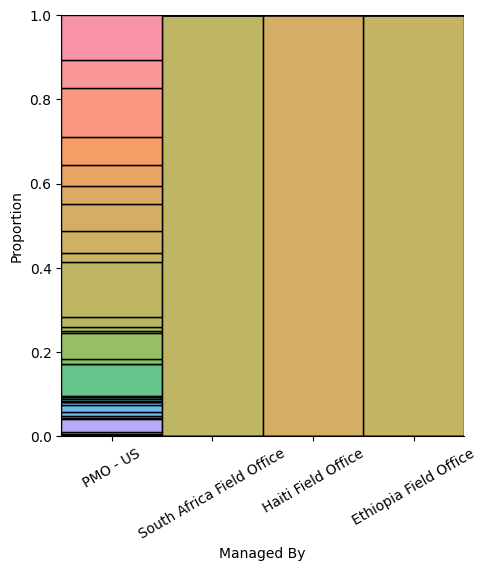

In [41]:
g = sns.displot(dataset, x="Managed By", hue="Country", multiple="fill", stat="proportion", legend=False, kind="hist")
g.set_xticklabels(rotation=30)

<Axes: xlabel='Shipment Mode', ylabel='Proportion'>

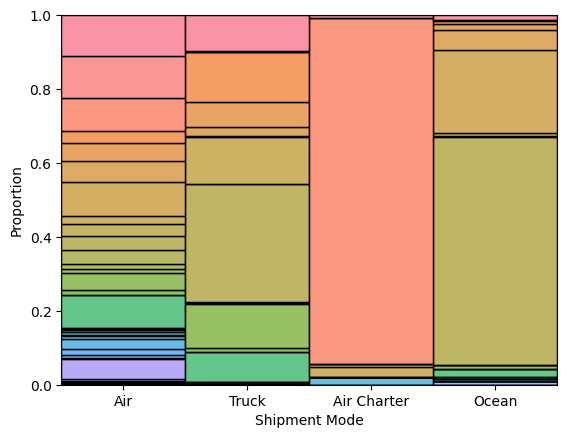

In [42]:
sns.histplot(dataset, x="Shipment Mode", hue="Country", multiple="fill", stat="proportion", legend=False)

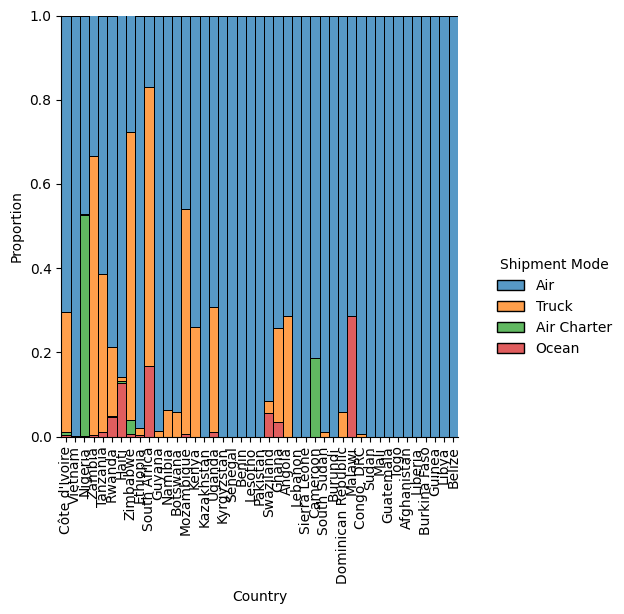

In [43]:
g = sns.displot(dataset, x="Country", hue="Shipment Mode", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=90)

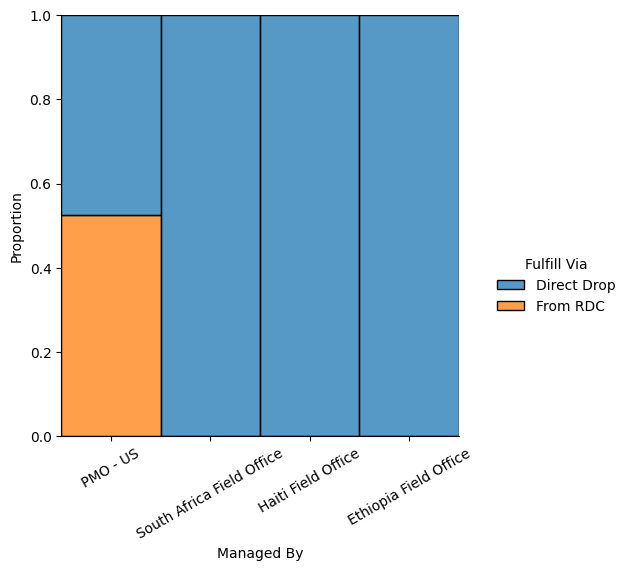

In [51]:
g = sns.displot(dataset, x="Managed By", hue="Fulfill Via", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=30)

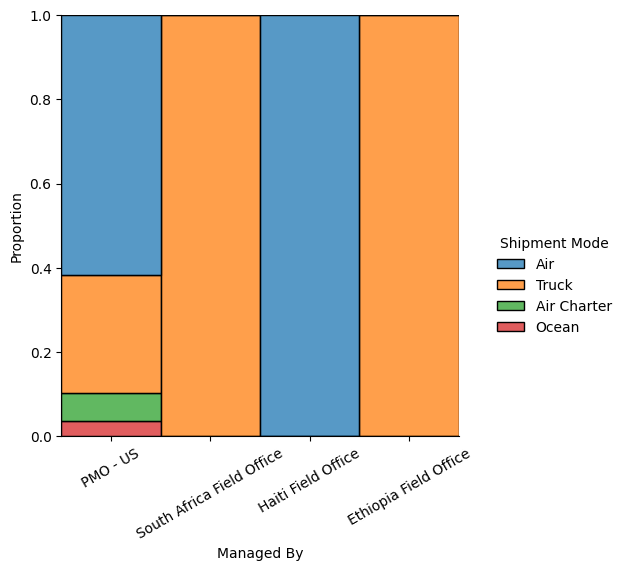

In [45]:
g = sns.displot(dataset, x="Managed By", hue="Shipment Mode", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=30)

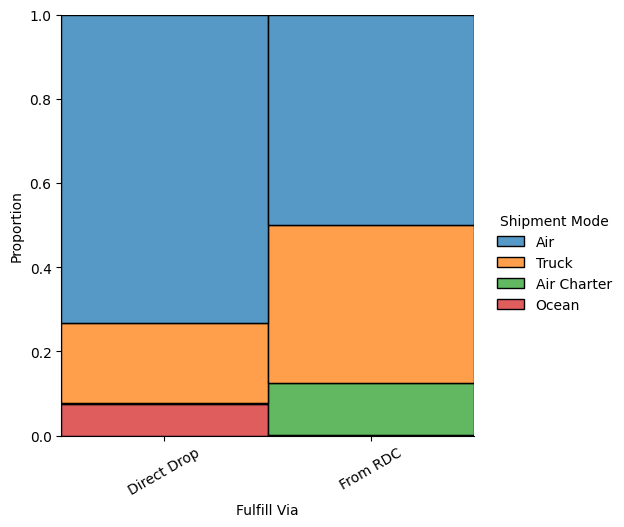

In [52]:
g = sns.displot(dataset, x="Fulfill Via", hue="Shipment Mode", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=30)

## Country -> Product Group -> Sub Classification + Brand

<Axes: xlabel='Product Group', ylabel='Proportion'>

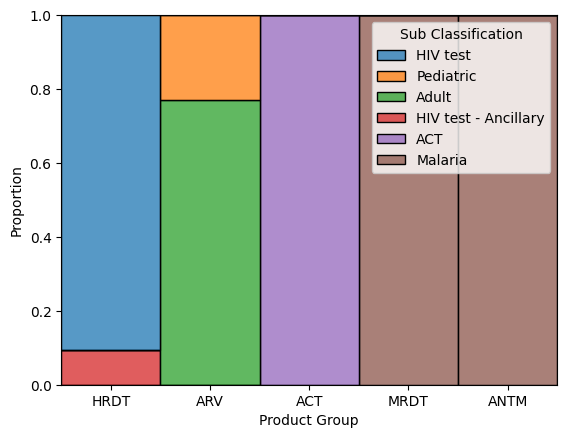

In [46]:
sns.histplot(dataset, x="Product Group", hue="Sub Classification", multiple="fill", stat="proportion")

<Axes: xlabel='Sub Classification', ylabel='Proportion'>

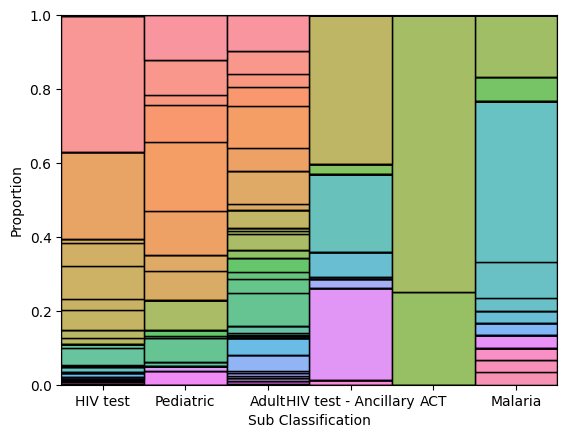

In [47]:
sns.histplot(dataset, x="Sub Classification", hue="Molecule/Test Type", multiple="fill", stat="proportion", legend=False)

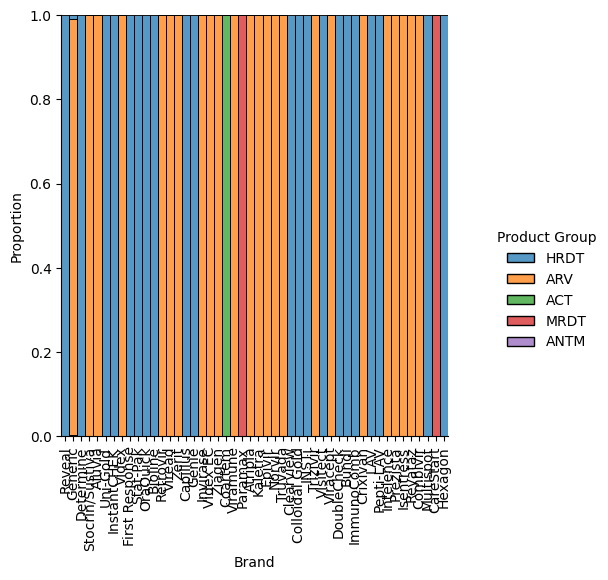

In [48]:
g = sns.displot(dataset, x="Brand", hue="Product Group", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=90)

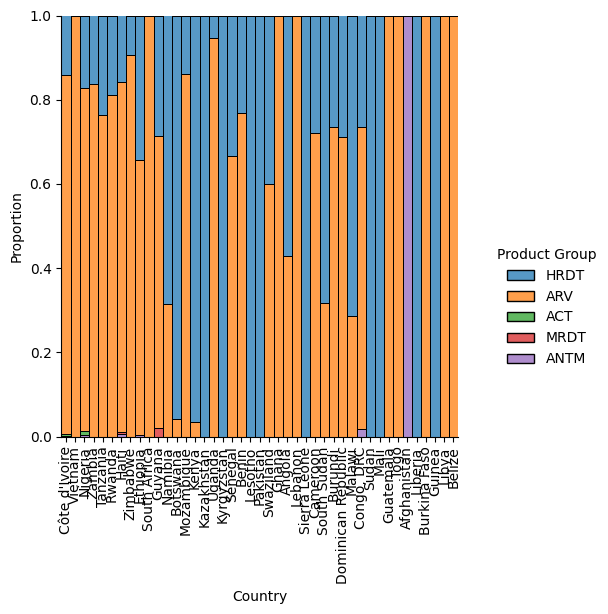

In [49]:
g = sns.displot(dataset, x="Country", hue="Product Group", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=90)

## Freight

AttributeError: Rectangle.set() got an unexpected keyword argument 'multiple'

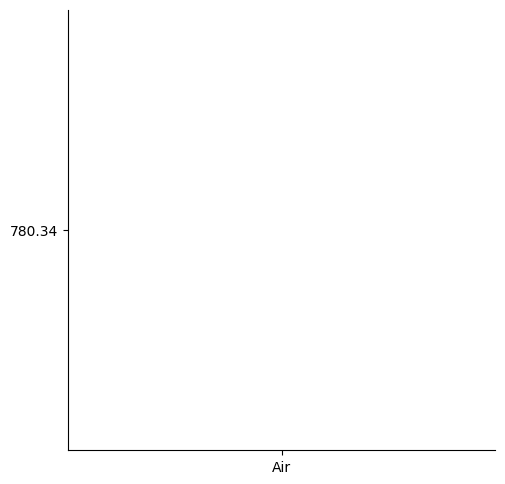

In [ ]:
g = sns.catplot(dataset, x="Shipment Mode", y="Freight Cost (USD)", kind="bar")
g.set_xticklabels(rotation=90)